In [2]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/raw/airline_delay_cause.csv")

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [5]:
df.shape, df.columns

((318017, 21),
 Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
        'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
        'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
        'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
        'security_delay', 'late_aircraft_delay'],
       dtype='object'))

In [6]:
cols_to_keep = [
    "year", "month", "carrier", "carrier_name",
    "airport", "airport_name",
    "arr_flights", "arr_del15",
    "arr_delay",
    "carrier_delay", "weather_delay", "nas_delay",
    "security_delay", "late_aircraft_delay"
]

df_clean = df[cols_to_keep].copy()

In [7]:
df_clean.isna().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [ ]:
df_clean = df_clean[df_clean["arr_flights"] > 0]

df_clean["delay_rate"] = df_clean["arr_del15"] / df_clean["arr_flights"]
df_clean["avg_delay_per_flight"] = df_clean["arr_delay"] / df_clean["arr_flights"]


In [9]:
df_clean[["delay_rate", "avg_delay_per_flight"]].describe()


,delay_rate,avg_delay_per_flight
count,317280.000000,317518.000000
mean,0.197760,11.148280
std,0.112311,8.844884
min,0.000000,0.000000
25%,0.122302,5.647059
50%,0.184896,9.521046
75%,0.258065,14.687500
max,1.000000,712.000000


In [10]:
airport_delays = (
    df_clean
    .groupby(["airport", "airport_name"], as_index=False)
    .agg(
        total_flights=("arr_flights", "sum"),
        total_delays=("arr_del15", "sum"),
        total_delay_minutes=("arr_delay", "sum")
    )
)

airport_delays["delay_rate"] = airport_delays["total_delays"] / airport_delays["total_flights"]


In [11]:
top_airports = (
    airport_delays[airport_delays["total_flights"] > 1000]
    .sort_values("delay_rate", ascending=False)
    .head(10)
)

top_airports


,airport,airport_name,total_flights,total_delays,total_delay_minutes,delay_rate
192,ILG,"Wilmington, DE: New Castle",2120.0,687.0,44552.0,0.324057
243,MCN,"Macon, GA: Middle Georgia Regional",6483.0,2050.0,129325.0,0.316212
290,OTH,"North Bend/Coos Bay, OR: Southwest Oregon Regi...",8631.0,2516.0,159450.0,0.291507
131,EWR,"Newark, NJ: Newark Liberty International",2385265.0,670034.0,47297459.0,0.280905
200,ISO,"Kinston, NC: Kinston Regional Jetport at Stall...",1456.0,407.0,25764.0,0.279533
20,APF,"Naples, FL: Naples Municipal",2418.0,674.0,35417.0,0.278743
300,PGD,"Punta Gorda, FL: Punta Gorda Airport",25623.0,7024.0,513879.0,0.274129
53,BQN,"Aguadilla, PR: Rafael Hernandez",26777.0,7226.0,435438.0,0.269858
299,PFN,"Panama City, FL: Bay County",23422.0,6244.0,351746.0,0.266587
70,CEC,"Crescent City, CA: Jack McNamara Field",11967.0,3145.0,192122.0,0.262806


Matplotlib is building the font cache; this may take a moment.


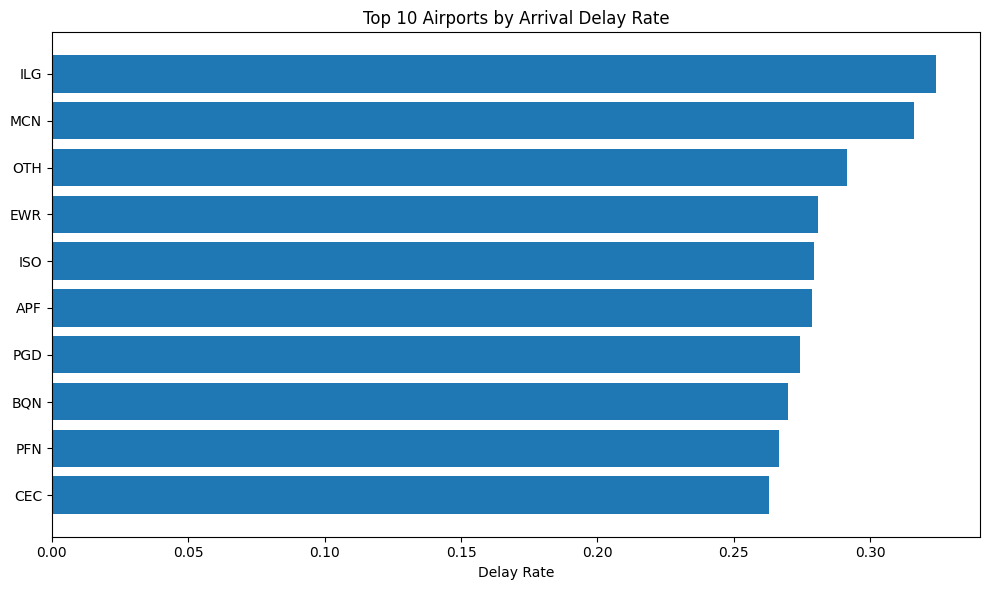

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_airports["airport"], top_airports["delay_rate"])
plt.xlabel("Delay Rate")
plt.title("Top 10 Airports by Arrival Delay Rate")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [16]:
df_clean.to_csv("../data/processed/airline_delay_clean.csv", index=False)


In [17]:
cause_cols = [
    "carrier_delay",
    "weather_delay",
    "nas_delay",
    "security_delay",
    "late_aircraft_delay"
]

cause_summary = df_clean[cause_cols].sum().sort_values(ascending=False)
cause_summary


late_aircraft_delay    506796286.0
carrier_delay          408520433.0
nas_delay              349128350.0
weather_delay           70036591.0
security_delay           2290908.0
dtype: float64

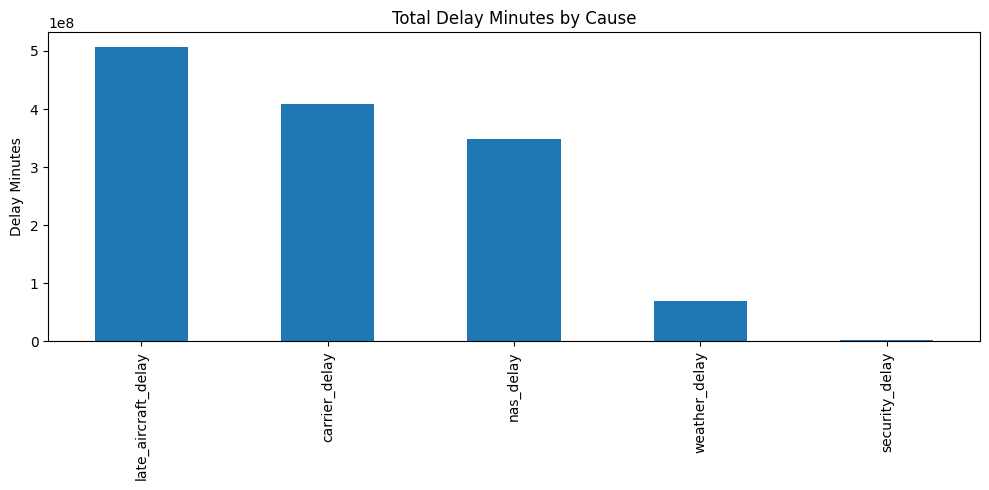

In [ ]:
cause_summary.plot(kind="bar", figsize=(10, 5))
plt.title("Total Delay Minutes by Cause")
plt.ylabel("Delay Minutes")
plt.tight_layout()
plt.show()
